# for regression & classification

In [5]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## KNeighborsClassifier

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype('float'))

X_train,X_test,y_train ,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7666666666666667

Text(0.5, 1.0, 'KNN (k=5)')

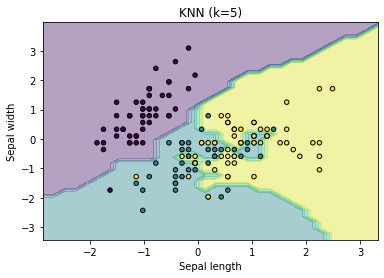

In [12]:
def plot_decision_boundaries(X,y,clf,resolution=0.2):
    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1 ,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1 ,X[:,1].max() + 1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))

    Z = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4)
    
    # Plot class samples
    plt.scatter(X[:,0],X[:,1],c=y,s = 20, edgecolors='k')
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
plot_decision_boundaries(X_scaled,y,knn)
plt.title('KNN (k=5)')
    

Text(0.5, 1.0, 'KNN (k=5)')

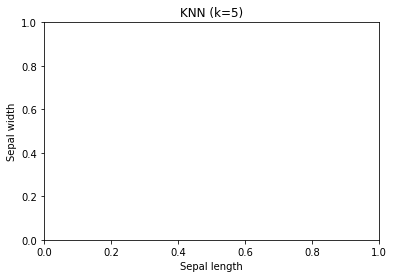

In [19]:
resolution=0.2

#plot the decision surface
x1_min,x1_max = X_scaled[:,0].min() - 1 ,X_scaled[:,0].max() + 1
x2_min,x2_max = X_scaled[:,1].min() - 1 ,X_scaled[:,1].max() + 1
display(x1_min,)
#xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
#                     np.arange(x2_min,x2_max,resolution))

#Z = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
#Z = Z.reshape(xx1.shape)

#plt.contourf(xx1,xx2,Z,alpha=0.4)

# Plot class samples
#plt.scatter(X[:,0],X[:,1],c=y,s = 20, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title('KNN (k=5)')

In [ ]:
#Ex KNeighborsClassifier

mnist_path = 'mnist-original.mat'

mnist = loadmat(mnist_path)
X = mnist['data'].aT
y = mnist['label'][0]
display(X.shape , y.shape)

#peek a digit
some_index = 36000
some_digit = X[some_index]
display(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)

#show y value
display(y[36000])